# Feature Extraction and Engineering


Today, we're going to be taking a look at is the process of feature extratction and engineering- the process of utilizing our data set and trying to extract meaningful information about it which could help us 'model reality' better and increase our prediction power potential.

First, let's import any package we might need and load our data.

## TOC:
* [Interactions](#Interactions)
* [Transformations](#Transformations)
* [Dimensionality reduction and its uses in feature engineering](#Dimensionality_reduction)
* [Categorical Data](#categorical_data)
* [Binning](#binning)
* [Cyclical transformations](#cyclic)
* [Imputation](#impute)
* [Aggregative features](#aggregate)
* [Geospatial Data](#spatial)








In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix,distance
from sklearn.preprocessing import StandardScaler

import random
import numpy as np
import sqlite3
import seaborn as sns
%matplotlib inline
import matplotlib
import warnings
import joypy

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18,8)

### Interactions <a class="anchor" id="Interactions"></a>

Let's talk about interactions between features - we say that two features interact when the effect of a feature on the target depends on the specific value a of a different feature.
Let's discuss it in the context of regression, where we have a feature binary feature x1 and a continuous feature x2.
Observe the following data:

<AxesSubplot:xlabel='x2', ylabel='y'>

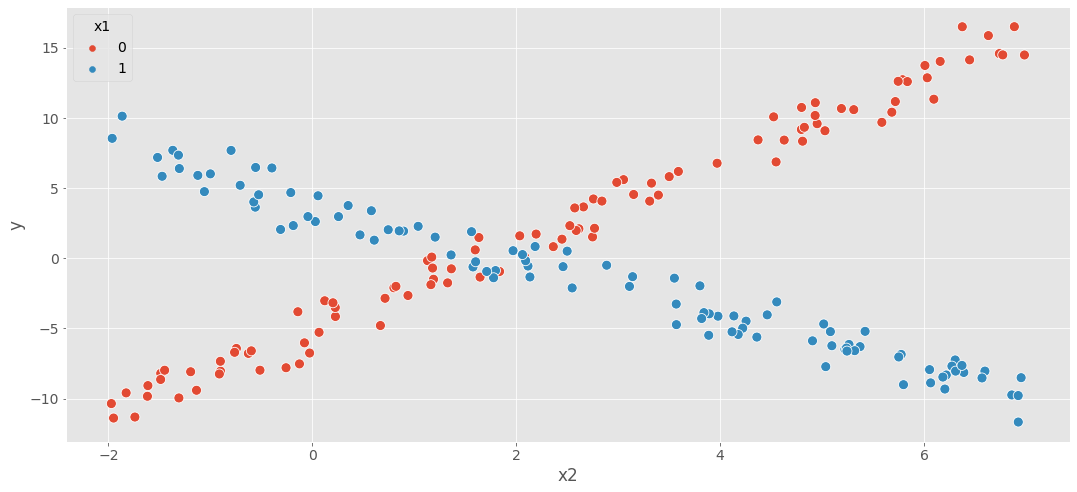

In [3]:
sigma = 1
n = 100
x = np.random.uniform(-2, 7, 2*n) 

x1 = np.array([0] * (n) + [1] * (n))

y1 = -5 + 3*x[:n] + np.random.normal(scale=sigma ,size=n)
y2 = 4 - 2*x[n:] + np.random.normal(scale=sigma, size=n)

x2 = x
df = pd.DataFrame({"x1": x1, "x2": x2, "y": np.concatenate((y1, y2))})
s = 100
sns.scatterplot(data=df, x="x2", y="y", s=s, hue="x1")


<AxesSubplot:xlabel='x2', ylabel='y'>

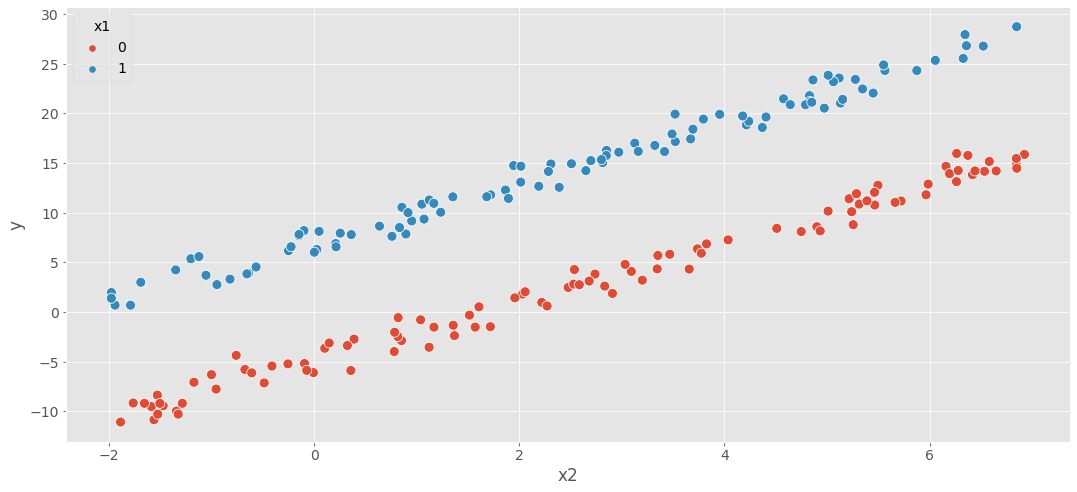

In [2]:
sigma = 1
n = 100
x = np.random.uniform(-2, 7, 2*n) 

x1 = np.array([0] * (n) + [1] * (n))

y1 = -5 + 3*x[:n] + np.random.normal(scale=sigma ,size=n)
y2 = 7 +3*x[n:] + np.random.normal(scale=sigma, size=n)

x2 = x
df = pd.DataFrame({"x1": x1, "x2": x2, "y": np.concatenate((y1, y2))})

sns.scatterplot(data=df, x="x2",s=100, y="y", hue="x1")

In this case, we say that there is no interaction between x1 and x2, as the effect of x2 is the same whether x1=0 or x1=1, as the coefficient corresponding to it x2 is the same.
<br>Recall the toy example we have seen in the previous notebook:


Now there is an interaction between the x1 and x2 variables - depending on the value of x1, the coefficient of x2 needs to be different.
Performing linear regression on this data, as is, will give poor results, but introducing a new feature - x1 * x2, will give us a much better fit, as we will be able to learn a different coefficient for each value of x1:

$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{1}x_{2}$


$x_{1}=0\Rightarrow y=\beta_{0}+\beta_{2}x_{2}$

$
x_{1}=1\Rightarrow y=\left(\beta_{0}+\beta_{1}\right)+\left(\beta_{2}+\beta_{3}\right)x_{2}
$



In [4]:
from sklearn import preprocessing
data = pd.read_csv("insurance.csv")
data.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,c
0,0,19,female,27.900,0,yes,southwest,16884.92400,r
1,1,18,male,33.770,1,no,southeast,1725.55230,b
2,2,28,male,33.000,3,no,southeast,4449.46200,b
3,3,33,male,22.705,0,no,northwest,21984.47061,b
4,4,32,male,28.880,0,no,northwest,3866.85520,b


Let's see an example of interaction between two categorical variables - bmi and smoker:

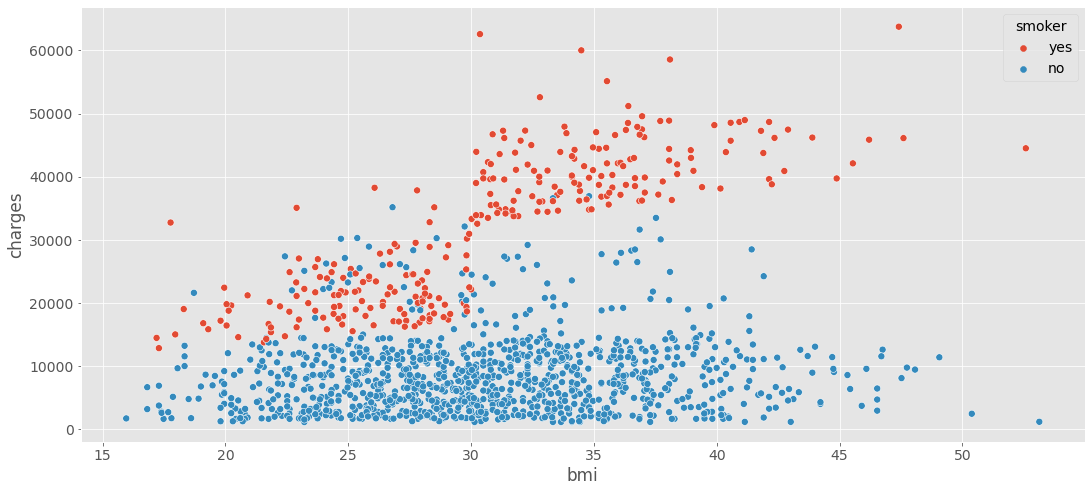

In [5]:
f = sns.scatterplot(data=data, x="bmi", y="charges",  hue="smoker",s=50)


We can add an interaction term as follows:

In [6]:
le = preprocessing.LabelEncoder()

data['smoker'] = le.fit_transform(data.smoker.values)
data['bmi*smoker'] = data['smoker'] * data['bmi']
data.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,c,bmi*smoker
0,0,19,female,27.900,0,1,southwest,16884.92400,r,27.9
1,1,18,male,33.770,1,0,southeast,1725.55230,b,0.0
2,2,28,male,33.000,3,0,southeast,4449.46200,b,0.0
3,3,33,male,22.705,0,0,northwest,21984.47061,b,0.0
4,4,32,male,28.880,0,0,northwest,3866.85520,b,0.0



### Transformations <a class="anchor" id="Transformations"></a>

Transformations on the data may have high impact on model performance.
<br>Let's load up a mew dataset and take a look to get an understanding about transformations.

In [7]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine(as_frame=True)
df = data.frame
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Let's perform some visualizations:

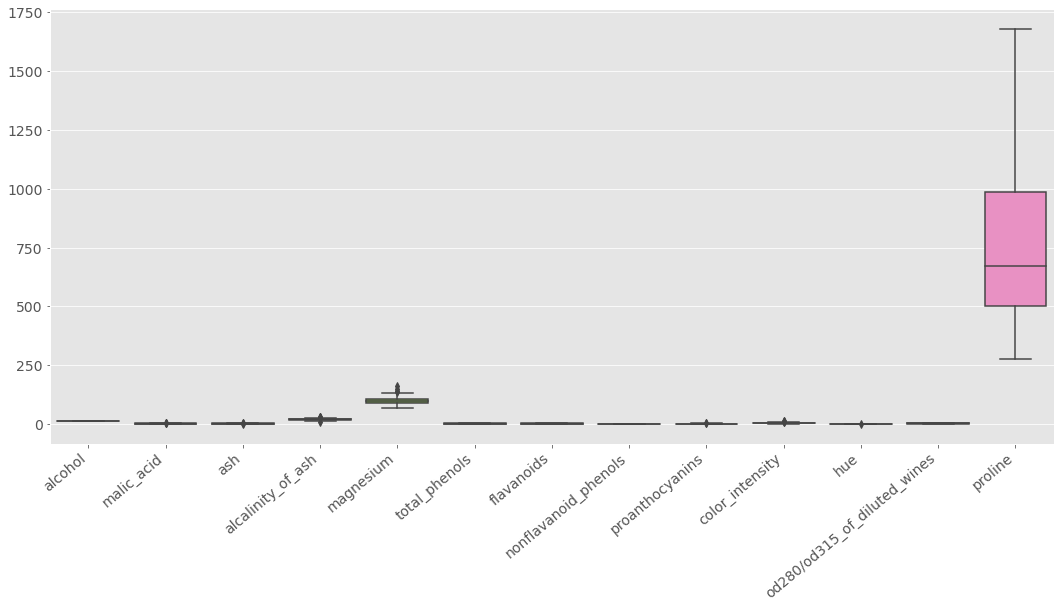

In [9]:
f = sns.boxplot(data=df[data.feature_names])
a = f.set_xticklabels(f.get_xticklabels(), rotation=40, ha="right")


We can see that the scale of proline is very different from the other features - it's mean and standard deviation is much higher then the other features, visualizing wihtout proline:

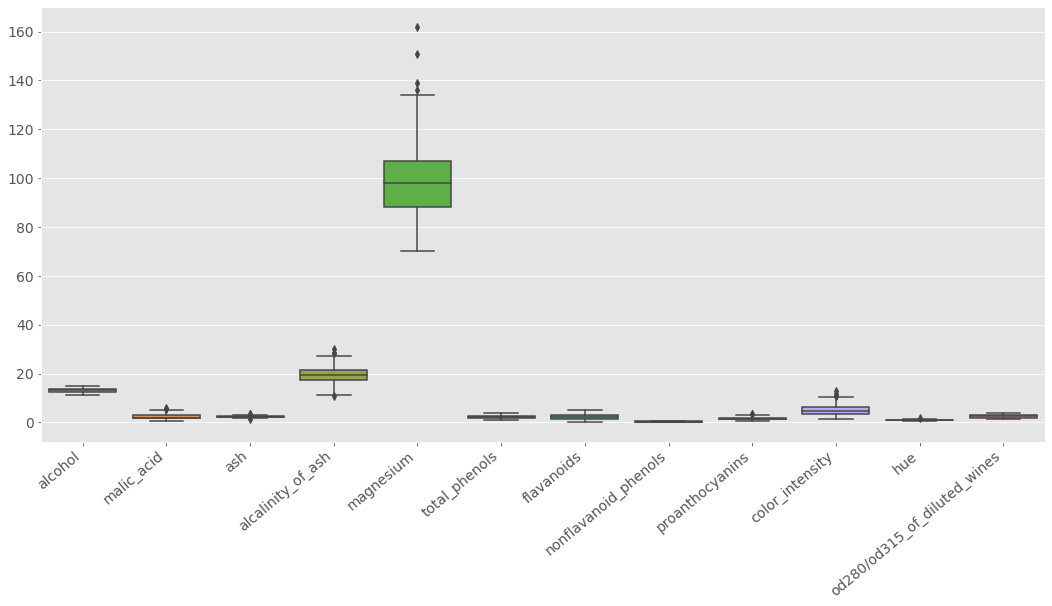

In [10]:
f = sns.boxplot(data=df[data.feature_names].drop('proline', axis=1))
a = f.set_xticklabels(f.get_xticklabels(), rotation=40, ha="right")


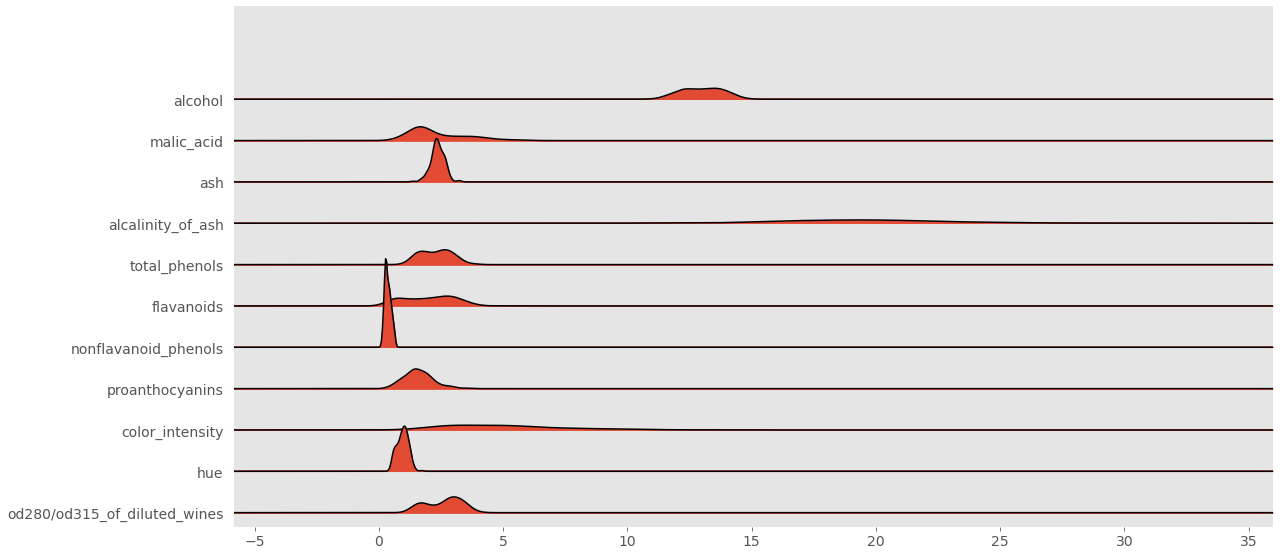

In [11]:
f,ax = joypy.joyplot(data=df[data.feature_names].drop(columns=['proline', 'magnesium'], axis=1))

Why this might be a problem?
- Interpretability: if we are using a linear model, then the estimated coefficients will be hard to interpret - their size might be different based on their scale, and not on how they effect the target with respect to each other, which can make it harder for us to understand which features are important. 

- Features with a wider range might dominate features with a smaller range.
- Optimization: some optimization methods might converge much faster when standarizing the data
- Numerical stability issues.


We can handle this by transformations on the individual features.
A very common transformation is standarization - subtracting the mean for each individual feature and dividing by its standard deviation.

<img src="https://miro.medium.com/max/1400/0*nBRmuBACyxk-XBbE.png" width=500/>



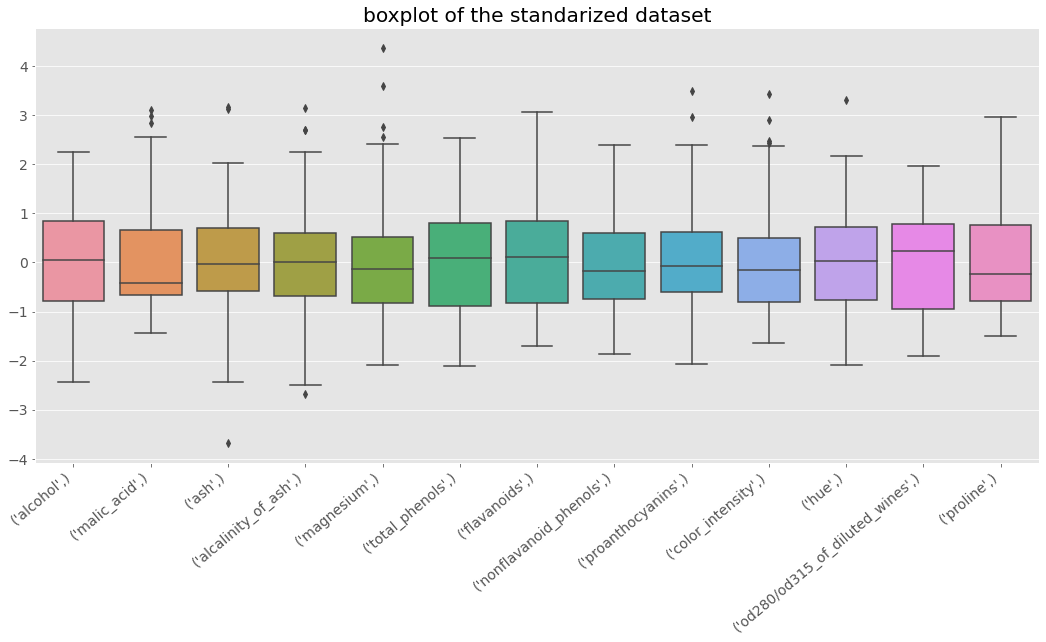

In [12]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[data.feature_names]), columns=[data.feature_names])


f = sns.boxplot(data=df_normalized)
f.set_title("boxplot of the standarized dataset")
a = f.set_xticklabels(f.get_xticklabels(), rotation=40, ha="right")


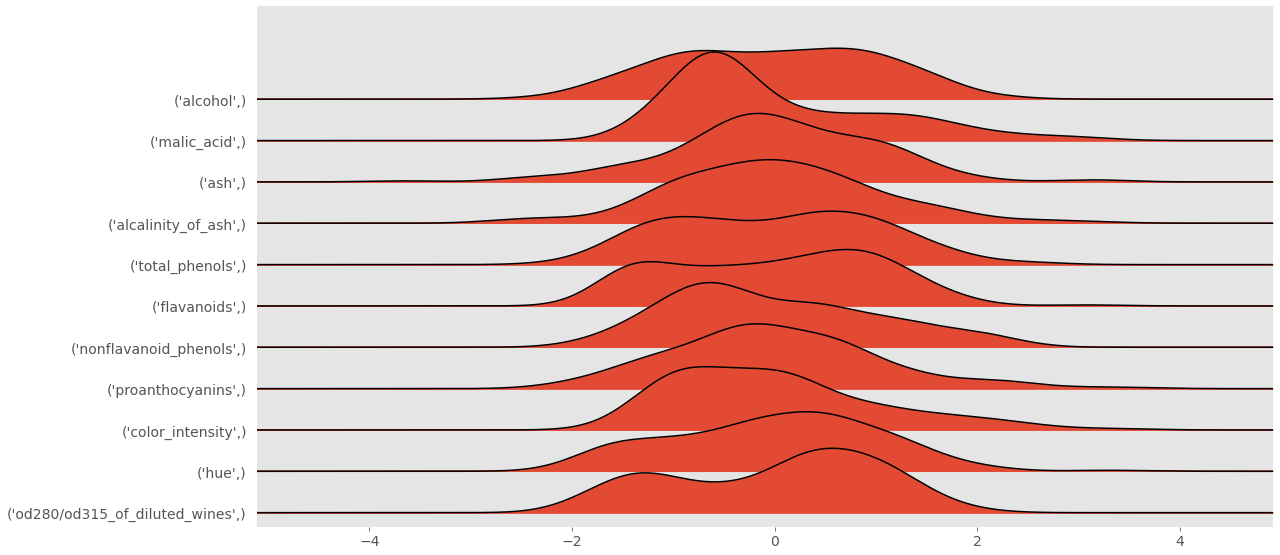

In [13]:
f,ax = joypy.joyplot(data=df_normalized[data.feature_names].drop(columns=['proline', 'magnesium'], axis=1))

In [14]:
f1 = 'flavanoids' 
f2 = 'total_phenols'
df_2 = df[[f1, f2, 'target']]

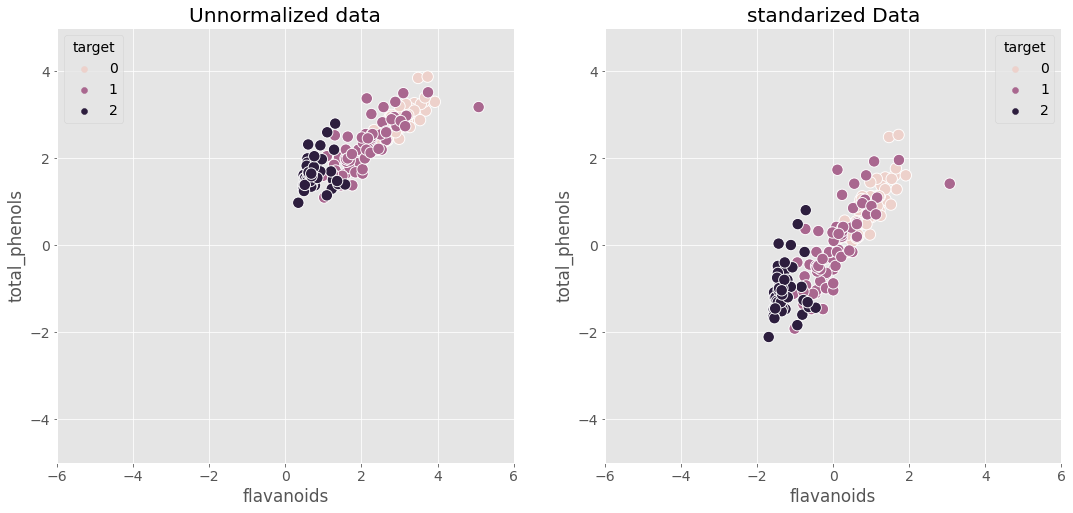

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_2[[f1, f2]]), columns=[f1, f2])
df_normalized.insert(2, 'target', df_2['target'])

ax[0].axis([-6, 6, -5, 5])
ax[1].axis([-6, 6, -5, 5])

_ = sns.scatterplot(data=df_2, x=f1, y=f2, hue="target", s=130, ax=ax[0])

_ = sns.scatterplot(data=df_normalized, x=f1, y=f2, hue="target", s=130, ax=ax[1])
ax[0].set_title("Unnormalized data")
ax[1].set_title("standarized Data")
plt.show()

There are various other transformations we can perform, such as:
* min-max scaling where the individual features rescale to a range, such as [0,1]. This can be good for preserving sparsity in the data.
* power transformation - a monotonic transformation which can make the data distribution more similar to a normal distribution.
* normalizing the samples to a norm of one, which can be helpful for measuring similarity between data points.

Notice that we should keep in mind the ML algorithm when performing such transformations, as some models don't care about the scaling of the data, and we may not need to perform such transformations.
For example, most tree based models will be insensitive to the scale as they are invariant to monotonic transformations of the data, as the decision based rules which are used in the tree are based on numeric comparions which are themselves invariant to monotonic transformations.





### Dimensionality reduction and its uses in feature engineering <a class="anchor" id="Dimensionality_reduction"></a>

Another common transformation is PCA - a dimensionality reduction technique, where we don't transform each feature individually, but create new features which are called principal components(PCs), each of which is a linear combination of the original features.
These PCs form an orthogonal basis, in which the data is decorrelated - no covariance between the PCs, the covariance matrix in this basis is diagonal.

We can also whiten the data - decorrelating the data and dividing each PC by it's eigenvalue, which means that the covariance matrix is not just diagonal, but unit-diagonal, which can make our data distribution be more like standard normal.

Text(0, 0.5, 'PC 2')

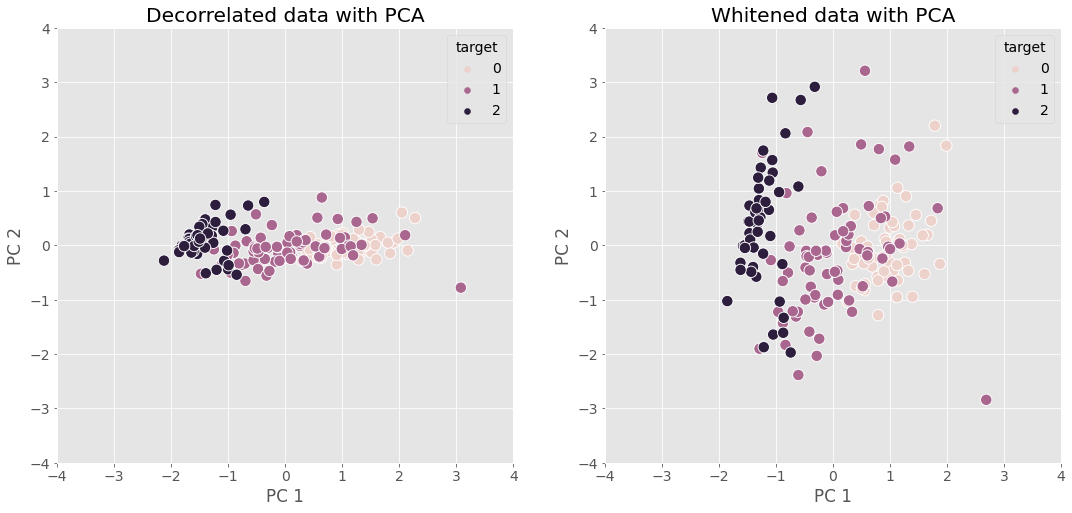

In [16]:
from sklearn.decomposition import PCA

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0].axis([-4, 4, -4, 4])
ax[1].axis([-4, 4, -4, 4])

pca = PCA(n_components=2)
embd = pca.fit_transform(df[[f1, f2]])

sns.scatterplot(x=embd[:, 0], y=embd[:, 1], hue=df['target'], s=130, ax=ax[0])
ax[0].set_title('Decorrelated data with PCA')
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")

pca_w = PCA(n_components=2, whiten=True)
embd_w = pca_w.fit_transform(df[[f1, f2]])
ax[1] = sns.scatterplot(x=embd_w[:, 0], y=embd_w[:, 1], hue=df['target'], s=130, ax=ax[1])
ax[1].set_title('Whitened data with PCA')
ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")


Notice on the left plot that the data was rotated, such the first PC contains most of the variance in the data, and that we can visually see that it's de-correlated.
On the right we can see that dividing by the eigenvalues spreaded the data, making its distribution look more standard normal.

Besides decorrelating the data we can perform PCA for feature reduction. this can be done by taking a subset of the principal components(which correspond to the n largest eigenvalues, which are the n PCs with the largest variance).
In this way, if for example we have correlated features, we can preserve information from both of them instead of removing an original feature.

This can improve model performance and training time.

Text(0, 0.5, '')

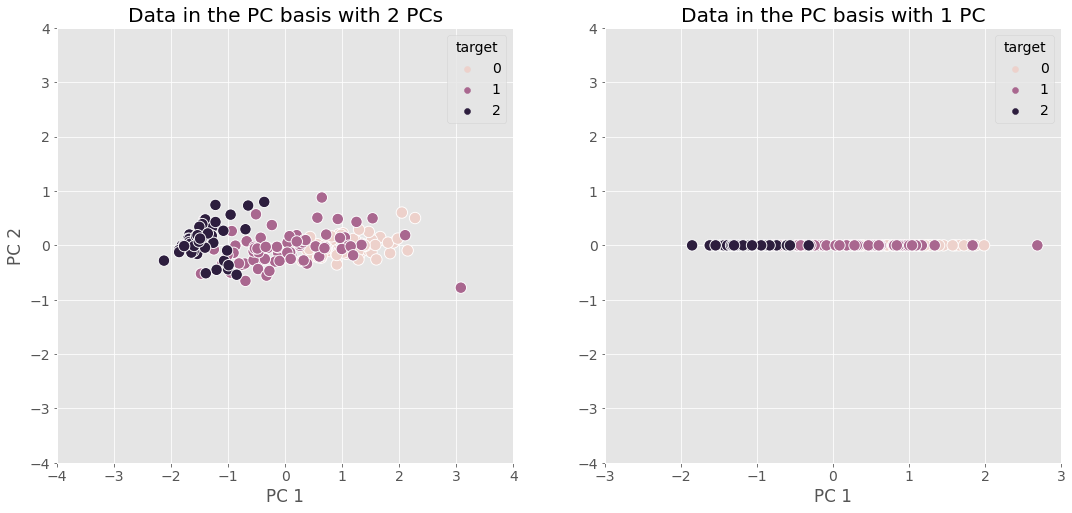

In [18]:

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0].axis([-4, 4, -4, 4])
ax[1].axis([-3, 3, -4, 4])

pca = PCA(n_components=2)
embd = pca.fit_transform(df[[f1, f2]])

sns.scatterplot(x=embd[:, 0], y=embd[:, 1], hue=df['target'], s=130, ax=ax[0])
ax[0].set_title('Data in the PC basis with 2 PCs')
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")

pca_w = PCA(n_components=2, whiten=True)
embd_w = pca_w.fit_transform(df[[f1, f2]])
ax[1] = sns.scatterplot(x=embd_w[:, 0], y=np.zeros_like(embd_w[:, 0]), hue=df['target'], s=130, ax=ax[1])
ax[1].set_title('Data in the PC basis with 1 PC')
ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("")


#### Moving on

In [9]:
base_df = pd.read_csv("station_df.csv")
events = pd.read_csv("event_df.csv")[["car","station","event_time"]]

In [20]:
base_df.head()

,station_id,capacity,longitude,latitude,address,official_station
0,1,4,34.800400,32.058597,"משה דיין 73-75, תל אביב יפו",1
1,3,6,34.759492,32.047511,עזה 32,1
2,4,7,34.841800,32.113800,דבורה הנביאה 124,1
3,5,6,34.789200,32.104900,"יעקב אפטר 3, תל אביב יפו",1
4,6,5,34.784400,32.061700,יד חרוצים 17,1


In [21]:
events.head()

,car,station,event_time
0,152,196,10/05/2019 0:00
1,20,164,10/05/2019 0:00
2,52,51,10/05/2019 0:00
3,199,60,10/05/2019 0:00
4,129,189,10/05/2019 0:00


First, let's take a minute and try to think of possible features we could extract here. How would you try to differentiate between different stations and times?

We'll start by casting our event_time columns to a datetime, and extracting the time of day.

In [22]:
events["event_time"]=pd.to_datetime(events["event_time"])
events['time']=events.apply(lambda row:(row['event_time'].hour+(row['event_time'].minute)/60)/24,axis=1)

A good feature to start with, which we could easily get, is the day of the week- perhaps specific days are busier in some areas in Tel Aviv which would affect AutoTel usage.

In [23]:
events['day']= events['event_time'].dt.weekday

Let's take this opportunity to talk about two intersting and important concepts- Categorical feature handling, and  Binning. 




### Categorical Data <a class="anchor" id="categorical_data"></a>

When approaching a dataset which includes categorical features, we might encounter a bit of a confusing issue: how do we properly handle this information? Take a minute before you read on, and think of a few methods. 
<br>Done? 
<br>Good.<br>
A few common ways to handle categorical features are as follows:
- One hot encoding: transform each value to a binary feature of its own. Beware that with high-cardinality features (i.e, categorical features with a very high amount of distinct values) this can increase your dataset's dimensionality by quite a lot. Take this into consideration- we're gonna see a method to deal with this sort of situation in just a minute.
- In the same way, we can use Ordinal/Label encoding- fit a number to replace each label. This is obviously unsuited to linear models, but could be used instead of one hot encoding for other types of models.
- Keeping things as they are: Some features are, by nature, ordinal- like the level of education a person has (None < High School < Doctorate), and fitting a relevant numeric scale helps maintain this relationship in a computationally-coherent manner.
- Frequency encoding: replace each features with its relative frequency in your train set. Notice that this sort of encoding somewhat alters the information you have- differing values with similar frequencies will obviously become similar. This sort of encoding introduces this sort of information while somewhat ignoring the the original label. Note that, by its nature, this sort of encoding keeps your dataset's cardinality rather low, as no additional columns are added.
- Target encoding: perform some function over the target value dependent on the feature value. For example, replace each category with the relative amount of positives in the training set (if the category existed in the first place). Note that this can cause information leakage and thus overfitting, and as such should be used carefully. 
- Trained embeddings: Using some other model (i.e, a neural net) we can try and learn latent representation for categories and use them instead of the original values.



### Binning <a class="anchor" id="binning"></a>

Occasionally, we may find ourself with problematically high cardinality features, like:

<img src="https://i1.wp.com/alastairrushworth.github.io/assets/images/inspect_cat_plot_1-1.png?w=578&ssl=1" />



As you might remember, in our last notebook, we grouped niche titles in to the 'Other' title- this is an example of binning, or the grouping of several values of a feature to a higher order one, which could better represent the feature's effect on our predicted target.

So, when using the day feature, we could include an additional feature we'd call 'isWeekend' as well- which could better encompass the effects of specific days. 

Later on, when performig feature selection, such features could prove to be better generalizing, and the decrease in our feature matrix dimension could both improve learnability and computational performance (think of the effects of feature amount on both a model's VC dim and its computational complexity).

### Cyclical Transformations <a class="anchor" id="cyclic"></a>

Let's tinker with our time data some more. 
When using time based feature, it's important to think of the periodicity of the time of day. 
The naive way is simply using the hour or partial time of day as a feature. To see where this approach could fail, think of the way a decision tree classifier makes 'decisions', for example:


<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg" />



Can you tell where problems might arise?

If we simply split on HOUR>22, for example, we're ignoring the fact that 1 AM is rather 'similar' to the our 23 in the time of day.
We can circumvent this by using sine and cosine transformations on the relative part of day of the given hours- as the combination of these values leaves hours which are 'closer' on the unit circle (or clock) closer together.

In [24]:
seconds_in_day = 24*60*60
seconds_in_week = 7 * seconds_in_day


events['time_in_seconds'] = pd.to_datetime(events['event_time']).values.astype(np.int64) // 10**6
events['day_sin_time'] = np.sin(2*np.pi*events.time_in_seconds/seconds_in_day)
events['day_cos_time'] = np.cos(2*np.pi*events.time_in_seconds/seconds_in_day)
events['sin_time_week'] = np.sin(2*np.pi*events.time_in_seconds/seconds_in_week)
events['cos_time_week'] = np.cos(2*np.pi*events.time_in_seconds/seconds_in_week)

### Imputation <a class="anchor" id="impute"></a>

In [25]:
conn = sqlite3.connect("example_db.db")
data = pd.read_sql("select * from titanic_data",conn)
conn.close()

In [26]:
def replace_fringe_titles(x):
    if x in ["Master","Miss","Mr","Mrs"]:
        return x
    return "Other"

data['Title']=data.Name.str.extract('([A-Za-z]+)\.')
data["Title"] = data["Title"].apply(lambda x:replace_fringe_titles(x))

In [27]:
X = data.drop(columns=["PassengerId","Name","Ticket","Cabin","Survived"])

In [28]:
X = pd.get_dummies(X,columns=['Sex',"Title","Embarked"],drop_first=True)

In [29]:
X = X[~X['Age'].isnull()]
y = X["Age"]
X = X.drop(columns=['Age'])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
rf = RandomForestRegressor(100,max_depth=15)


In [33]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15)

In [34]:
rf.score(X_train,y_train)

0.7411552969134738

In [35]:
def impute_age(x,age):
    if not age:
        return rf.predict(x)
    return age

### Aggregative features <a class="anchor" id="aggregate"></a>

Remember our talk about aggregate functions? It's time to put them to use.

When trying to find out whether or not we're gonna be able to park at a certain station in a given time, we should try and take some time to figure out what the station's 'routine' looks like- how many cars tend to park in it at any given time? And around the time when we want to park?<br>
This is exactly the manner in which we use aggregate functions. For example, let's calculate the mean amount of cars in any station, combined with the time of day:

In [36]:

counter = events.groupby(["station","event_time"]).count().reset_index()[["station","event_time","car"]].rename(columns={"car":"count"})

In [37]:
events = events.merge(counter,on = ["station","event_time"])

In [38]:

events.groupby(["station","day"]).agg({"count":["mean","max"]})

count    
                  mean max
station  day              
1        0    1.000000   1
         1    1.000000   1
         2    1.000000   1
         3    1.030534   2
         4    1.000000   1
...                ...  ..
99997299 0    1.000000   1
99997475 4    1.000000   1
99998528 2    1.000000   1
99998534 2    1.000000   1
99998628 5    1.000000   1

[340789 rows x 2 columns]

In [39]:
events['mean_day_count']=events.groupby(["station","day"])['count'].transform("mean")
events['day_rel_count']=events['count']/events['mean_day_count']


### Geospatial Data <a class="anchor" id="spatial"></a>

Something we've yet to touch upon, and could prove to be highly useful, is each station's longitude and latitdue. The amount of information we can obtain using coordinates is enormous- we can use the myriad of APIs (like OSM or Tel Aviv's own Open Data initiative) out there to check for close-by points of interest, for example. We can also use less percise versions of our existing coordinates as a form of binning to attempt to extract more general information about out data points' location.
Let's take a look at some other feature we can derive from our spatial data.

##### OPTIONAL: Working with spatial data in python

Python has a specific toolset for working with spatial data. These next two cells set up our dataframe for work with spatial data, and are kept here as an example if you care to get more familiar with it.

When working with spatial data, it's important to understand hope geographic coordinate systems work.
In the second cell below, you will see that both variables created are of the Proj (or projection) class. These correspond to two different coordinate reference system , or CRS.
A coordinate reference system is made out of two essential components. Below is some general information to help understand them:
- Datum: As the earth is not EXACTLY a sphere (i.e, it is of a geoidic shape). When projected over a 2d space, as is used in our geographic coordinate system, there are bound to be some precision errors in measurement. A datum is essentialy such a projection, where different datums are different in their tangent points to the earth itself- where measurements are mroe accurate. We'll be using the standard WGS84 datum, a generally used datum.
- The projection or coordinate method- usually either a straight up metric system (where the entire datum is split to several 'rectangles' of set overall area (UTM36N below) or using stereographic projection to define coordinates.

Much of the use of spatial data in Python can be done through Geopandas, a pandas extension, which allows the user to set a geographic column which can then be used for spatial operations- like spatial joins, creating polygons and ascertaining spatial interactions and more. Shapely is the basic geographic library which allows us to generate geographic objects.

In [1]:
import geopandas as gpd
import pyproj
import shapely 

In [10]:
wgs84p=pyproj.Proj("+init=EPSG:4326")
UTM36N=pyproj.Proj("+init=EPSG:32636")

df = gpd.GeoDataFrame(base_df)
df['geometry'] = df.apply(lambda row: shapely.geometry.point.Point(row['longitude'],row['latitude']),axis=1)
df.crs ={'init':'epsg:4236','no_defs':True}
df = df.to_crs(epsg='32636')
df['x'] = df.geometry.x
df['y'] = df.geometry.y

For our example, we're gonna create two types of features. First, we'll calculate the amount of stations within 250 and 500 meters from each station- using the distance_matrix function from scipy.

In [11]:
df['under_500']=[len(i[i<=500])for i in distance_matrix(df[['x','y']],df[['x','y']])]
df['under_250']=[len(i[i<=250])for i in distance_matrix(df[['x','y']],df[['x','y']])]
    

And the center for each station from their overall center, again using a scipy function:

In [12]:
means=(df[['longitude','latitude']].drop_duplicates().mean())
means = (means[0],means[1])

In [13]:
df['center_distance'] = df.apply(lambda row: distance.euclidean([row['longitude'],row['latitude']],list(means)),axis=1)

In [14]:
df['center_distance_two'] = df.apply(lambda row: distance.cityblock([row['longitude'],row['latitude']],list(means)),axis=1)

Note that, depending on your need, you can (and maybe should) use different distance measures as different features.

In [3]:
import requests as re
import json

In [4]:
open_tlv_url ="https://gisn.tel-aviv.gov.il/arcgis/rest/services/IView2/MapServer/835/query?where=1%3D1&outFields=*&f=json"

In [5]:

telofun = [shapely.geometry.point.Point(i['geometry']['x'],
                        i['geometry']['y'])
                        for i in json.loads(re.get(open_tlv_url).text)['features']]

In [6]:
telofun_gpd=gpd.GeoDataFrame(geometry=telofun,crs={'init':'epsg:2039','no_defs':True}).to_crs(epsg='32636')

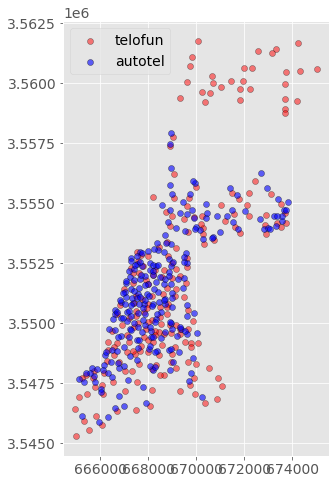

In [15]:
fig,ax= plt.subplots(figsize=(8,8))
telofun_gpd.plot(ax=ax,c='r',label='telofun',alpha=.5,edgecolor='black')
df.plot(ax=ax,label='autotel',alpha=.6,edgecolor='black',c='b')
plt.legend()

In [ ]:
df.geometry=df.geometry.buffer(250)


In [ ]:
gpd.sjoin(df,telofun_gpd,how='left').groupby("station_id")['index_right'].count().reset_index()

#### "Smart" binning- using clustering

So, earlier on we talked about binning as a method to reduce feature cardinality. We can also use this to improve upon existing features and add new ones.

Before we start, we're going to talk about a new clustering algorithm we haven't seen yet- DBSCAN.

First, some motivation:

Say we wanted to separate these concentric circles:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db2-1.png" width="400">



Trying to separate them with kmeans yields the following results:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db3-e1584587333779.png" width="400">



DBSCAN works like so:
- Using two hyperparameters, $\epsilon$ and k, determine which point in the dataset has at least k neighbors of a distance of at most $\epsilon$. Designate these as core points.
- If a point is reachable from a core point (i.e in the $\epsilon$ neighborhood of a core point) and isn't a core point, label it a border point.
- Other points are outliers.
- Consolidate all reachable non-outliers to clusters.

This allows us to cluster above concentric points like so:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db6-e1584577503359.png" width="400">



And to cluster using density rather than shape, allowing this:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/1024px-DBSCAN-density-data.svg.png" width="300">



How does this help?
<br>As a motivation, sometimes we might want to perform a higher or lower categorization of data. We're going to use DBSCAN as a way to categorize spatial data.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(500,)
dbscan.fit(df[['x','y']])

Let's take a look at the labels:


In [ ]:
pd.Series(dbscan.labels_).value_counts()

DBSCAN assignes outliers -1 as their label, and other points to their respective label.

In [ ]:
figure,ax = plt.subplots(figsize=(8,8))
colors ={i:j for i,j in zip(set(dbscan.labels_),['r','y','b','g'])}
for i in colors:    
    df[dbscan.labels_==i].plot(c=colors[i],label=i,ax=ax)
# df.plot(c=dbscan.labels_,label=dbscan.labels_)
plt.legend()

### Why is this a terrible example? 

Stay critical.

Say we wanted to perform the above seperation of inner and outer circles, with this data:

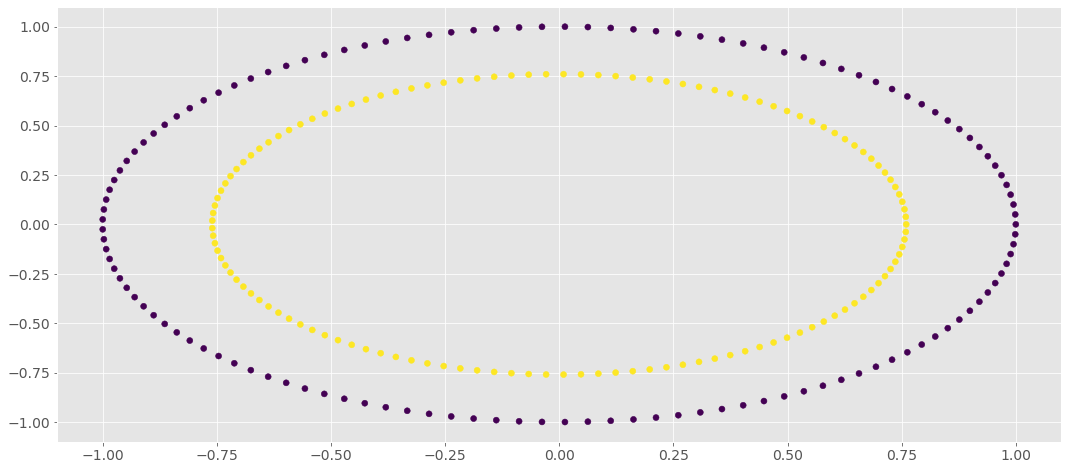

In [26]:
import sklearn.datasets 
data,labels = sklearn.datasets.make_circles(n_samples=250, factor=0.76)
plt.scatter(data[:,0],data[:,1],c=labels)

This is a case where we could use DBSCAN, right?

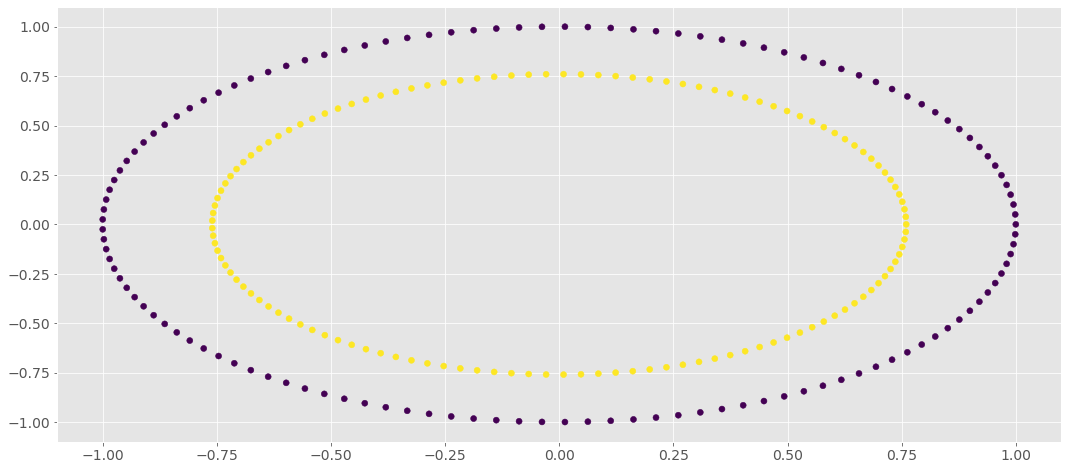

In [33]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=.1)
preds = db.fit_predict(data)
plt.scatter(data[:,0],data[:,1],c=preds)

But is it worth it?

Tuning and using alorithms willy-nilly (yeah) is fun, but we should always ask ourselves if there's no better way to do represent problems- this is what feature engineering is all about.

So, how can we better represent this data?

(array([125.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.]),
 array([0.76 , 0.784, 0.808, 0.832, 0.856, 0.88 , 0.904, 0.928, 0.952,
        0.976, 1.   ]),
 <BarContainer object of 10 artists>)

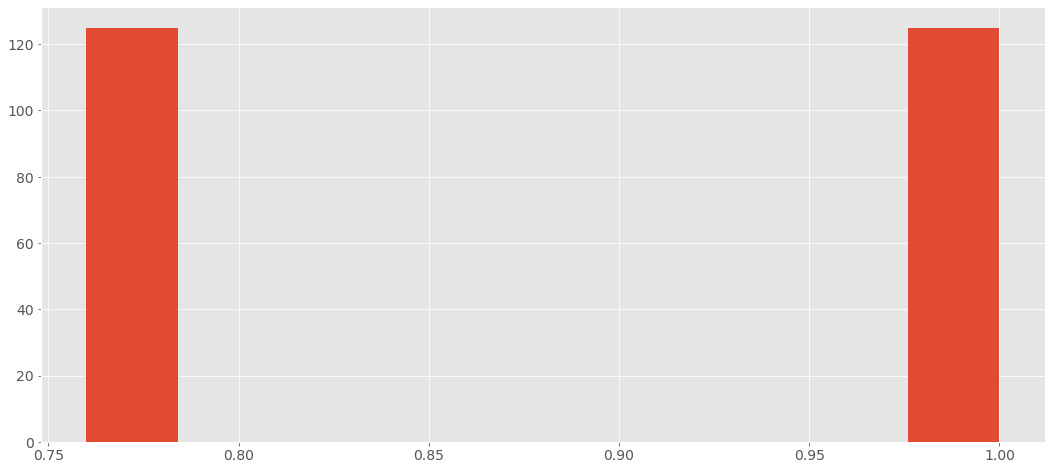

In [36]:
plt.hist(np.linalg.norm(data,axis=1.))

Well.

Stay critical.

### Extra: some NLP basics

We're not going to go too much into Natural Language Processing in this course, but it is useful to have a look at have a look at how some feature extraction is performed in this domain.


In [38]:
texts = pd.read_csv("train.csv")[['0','1','2']]

In [39]:
texts=texts.rename(columns={"0":'writer',"1":'file',"2":'text'})

Genralized feature extraction:

We'll start by finding general indicators and features for each text. For example, we can extract the use of different punctuation marks or the amount of different sentences:

In [40]:
texts['excalamations']=texts['text'].str.count('!')

We can also find the amount of unique words, or the mean length for each word:

In [41]:
texts['unique_words']=texts['text'].apply(lambda x: len(x.split(".")))

In [42]:
texts['mean_word_len']=texts['text'].apply(lambda x: np.mean([len(i) for i in x.split(" ")]))

(array([ 1.,  0.,  2.,  4., 12., 13., 10.,  6.,  1.,  1.]),
 array([4.97731884, 5.03981647, 5.1023141 , 5.16481173, 5.22730936,
        5.28980699, 5.35230463, 5.41480226, 5.47729989, 5.53979752,
        5.60229515]),
 <BarContainer object of 10 artists>)

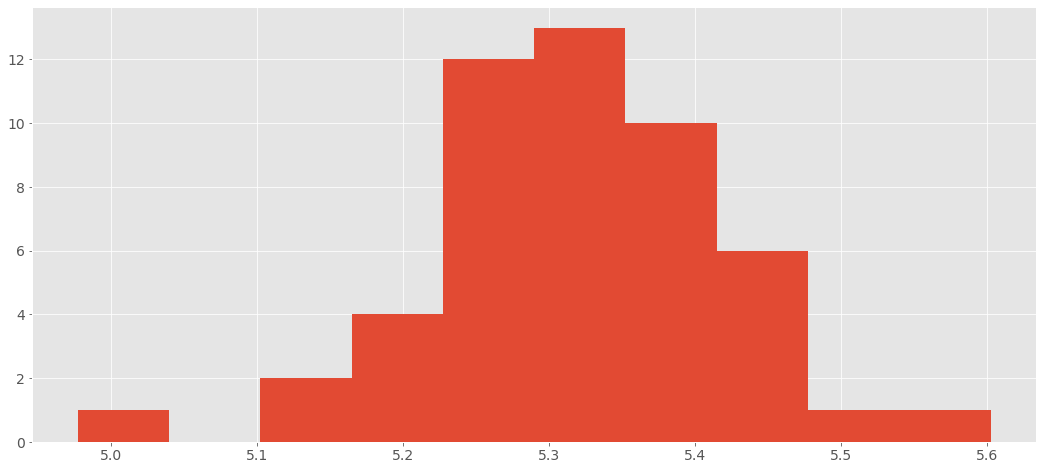

In [43]:
plt.hist(texts.groupby("writer").mean().sort_values('mean_word_len')['mean_word_len'])

Not that that's settled, we can create features that depend on the texts themselves. A common and reasonable enough method for textual feature extraction is known as the BOW, or bag of words method. We simply take the count for each word in the entire dataset for each element. There are quite a few common preprocessing methods applied to texts beforehand - like removing very common words (also called stop words) and stemming the words themselves.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer


In [45]:
CountVectorizer().fit_transform(texts['text'])

<2500x29137 sparse matrix of type '<class 'numpy.int64'>'
	with 637395 stored elements in Compressed Sparse Row format>

As you can see, we (probably) get an extremely sparse dataframe. We can further process this by using the TF-IDF method.

TF-IDF is a common text processing method split into two parts:
 - TF, or term frequency, is the amount of appearances of a term $t$ in a document $d$ 
 - IDF, or inverse document frequency, gives us a measure of how common a term is in all existing documents. it is usually calculated as $log(N/|{d:t\in d}|)$, where N is the overall document count and the denominator is the amount of documents that have the term $t$ in them.

This gives us a measure of how rare a word is, and how prevalent it is in the specific text itself.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
TfidfVectorizer(min_df=7,max_df=80).fit_transform(texts['text'])

#### Word and general embeddings

An embedding is usually a low-dimensional representation you can translate high-dimensional data into, that can help model large inputs like sparse vectors representing words. Ideally, we'd like an embedding to capture some of the semantics of the input by placing similar inputs close together in the embedding space. An embedding can be learned and reused across models. 
<br>Embeddings can be, and often are, used instead of naive representations like word counts, and can be also used to learn representations for categorical data. While we can used traditional methods to learn embeddings, like PCA, UMAP or even SVD decompositions, most modern embeddings are trained using neural networks- feeding a one hot vectorized version of the categorical features as an input.



#### Built in tools for processing and extraction

As you might recall from our previous session, Python has many existing tools for performing many of the tasks we've seen and talked about today.

As an example, let's look at sklearn- which you might remember from IML. Aside from different models to use later on, sklearn has a preprocessing module which allows us to fit and retain, for example, scaling and encoding classes- which allow us to use the same exact encodings and scaling values for new datasets.